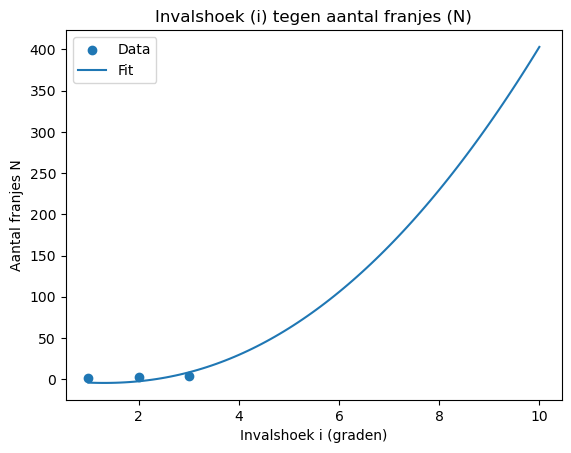

De brekingsindex: [8.91085255]


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def N_fit(i, n): 
      
    # constanten
    l = (435 * 10**-9)   # golflengte (m)
    d = 0.01   # dikte (m)
    i_rad = i*np.pi/180
    return (2*d/l) * ((n**2)/np.sqrt(n**2 - np.sin(i_rad)**2) - n - np.cos(i_rad) + 1 - (np.sin(i_rad)**(3/2)/n))

#i is invalshoek (graden)
#n is brekingsindex (-)


# data
i_data = np.array([1, 2, 3])  
N_data = np.array([2, 3, 4])

# fit uitvoeren (alleen n laten fitten)
popt, pcov = curve_fit(N_fit, i_data, N_data, p0=[1.5]) 
n_fit = popt

# plot
i_fit = np.linspace(1, 10, 100)
plt.scatter(i_data, N_data, label="Data")
plt.plot(i_fit, N_fit(i_fit, *popt), label="Fit")
plt.title("Invalshoek (i) tegen aantal franjes (N)")
plt.xlabel("Invalshoek i (graden)")
plt.ylabel("Aantal franjes N")
plt.legend()
plt.show()

print("De brekingsindex:", n_fit)
